In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv(r'C:\Users\Dell\Desktop\ai assignment\data\dataset.csv')

In [5]:
# Use the dataset already loaded in the notebook
df = data.copy()
print(f"Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset loaded: 4424 rows × 35 columns


In [6]:
# Display the first 5 rows to understand the data structure
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [9]:
# Display statistical summary of all numerical columns
print("Statistical Summary:")
df.describe()

Statistical Summary:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [10]:
# Check for missing values in each column
print("Missing Values per Column:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")

Missing Values per Column:
No missing values found!


In [11]:
# Check for and remove duplicate rows if any exist
duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")
 

Duplicate rows found: 0


In [13]:
# Selecting features - 5 most imporatant 
print("FEATURE SELECTION FOR STUDENT ACADEMIC RISK PREDICTION")
selected_features = [
    'Curricular units 1st sem (grade)',      # Academic performance - Semester 1
    'Curricular units 2nd sem (grade)',      # Academic performance - Semester 2  
    'Curricular units 1st sem (approved)',   # Course completion rate
    'Age at enrollment',                      # Student demographics
    'Scholarship holder'                      # Financial support indicator
]
print("\nSelected 5 Key Features:")
for i, feature in enumerate(selected_features, 1):
    print(f"  {i}. {feature}")


FEATURE SELECTION FOR STUDENT ACADEMIC RISK PREDICTION

Selected 5 Key Features:
  1. Curricular units 1st sem (grade)
  2. Curricular units 2nd sem (grade)
  3. Curricular units 1st sem (approved)
  4. Age at enrollment
  5. Scholarship holder


In [15]:
# Create cleaned dataset with only selected features and target
df_cleaned = df[selected_features + ['Target']].copy()
print(f"\nCleaned dataset created with shape: {df_cleaned.shape}")


Cleaned dataset created with shape: (4424, 6)


In [16]:
# Check for missing values in selected features
print("\nChecking for missing values:")
missing_in_selected = df_cleaned.isnull().sum()
print(missing_in_selected)


Checking for missing values:
Curricular units 1st sem (grade)       0
Curricular units 2nd sem (grade)       0
Curricular units 1st sem (approved)    0
Age at enrollment                      0
Scholarship holder                     0
Target                                 0
dtype: int64


In [17]:
# Remove rows with missing values in critical features
initial_rows = len(df_cleaned)
df_cleaned = df_cleaned.dropna()
print(f"\nRows before cleaning: {initial_rows}")
print(f"Rows after cleaning: {len(df_cleaned)}")
print(f"Rows removed: {initial_rows - len(df_cleaned)}")



Rows before cleaning: 4424
Rows after cleaning: 4424
Rows removed: 0


In [18]:
# Convert Target to binary (At Risk vs Not At Risk)
# Dropout/Enrolled = At Risk (1), Graduate = Not At Risk (0)
print("TARGET VARIABLE TRANSFORMATION")

print("\nOriginal Target Distribution:")
print(df_cleaned['Target'].value_counts())

df_cleaned['Risk'] = df_cleaned['Target'].apply(
    lambda x: 1 if x in ['Dropout', 'Enrolled'] else 0
)

print("\nTransformed Risk Distribution:")
print(df_cleaned['Risk'].value_counts())
print("\n  0 = Not At Risk (Graduate)")
print("  1 = At Risk (Dropout/Enrolled)")


TARGET VARIABLE TRANSFORMATION

Original Target Distribution:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Transformed Risk Distribution:
Risk
1    2215
0    2209
Name: count, dtype: int64

  0 = Not At Risk (Graduate)
  1 = At Risk (Dropout/Enrolled)


In [19]:
# Remove original Target column
df_cleaned = df_cleaned.drop('Target', axis=1)


In [20]:

print(f"\nFinal dataset shape: {df_cleaned.shape[0]} students × {df_cleaned.shape[1]} features")
print("\nFeature Statistics:")
print(df_cleaned.describe())



Final dataset shape: 4424 students × 6 features

Feature Statistics:
       Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)  \
count                       4424.000000                       4424.000000   
mean                          10.640822                         10.230206   
std                            4.843663                          5.210808   
min                            0.000000                          0.000000   
25%                           11.000000                         10.750000   
50%                           12.285714                         12.200000   
75%                           13.400000                         13.333333   
max                           18.875000                         18.571429   

       Curricular units 1st sem (approved)  Age at enrollment  \
count                          4424.000000        4424.000000   
mean                              4.706600          23.265145   
std                               3.09423

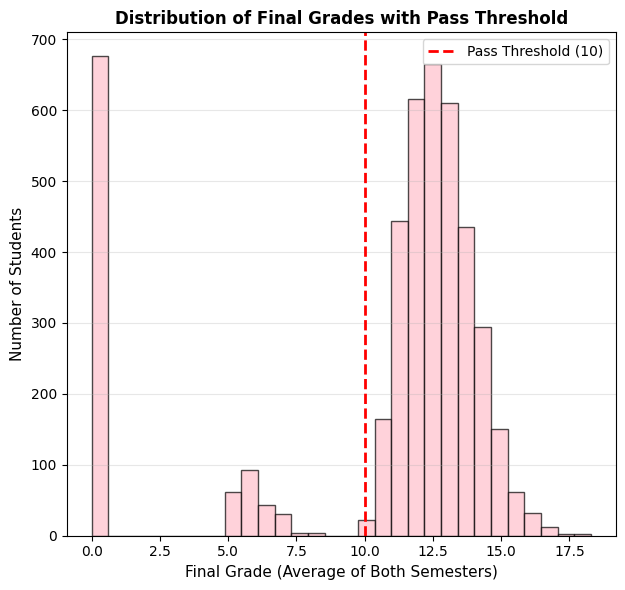

In [33]:
# Visualize the distribution of final grades with pass threshold line
df_cleaned['Final_Grade'] = (df_cleaned['Curricular units 1st sem (grade)'] + 
                               df_cleaned['Curricular units 2nd sem (grade)']) / 2

# Create visualization
plt.figure(figsize=(12, 6))

# Plot: Distribution of Final Grades
plt.subplot(1, 2, 1)
plt.hist(df_cleaned['Final_Grade'], bins=30, edgecolor='black', alpha=0.7, color='pink')
plt.axvline(x=10, color='red', linestyle='--', linewidth=2, label='Pass Threshold (10)')
plt.xlabel('Final Grade (Average of Both Semesters)', fontsize=11)
plt.ylabel('Number of Students', fontsize=11)
plt.title('Distribution of Final Grades with Pass Threshold', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

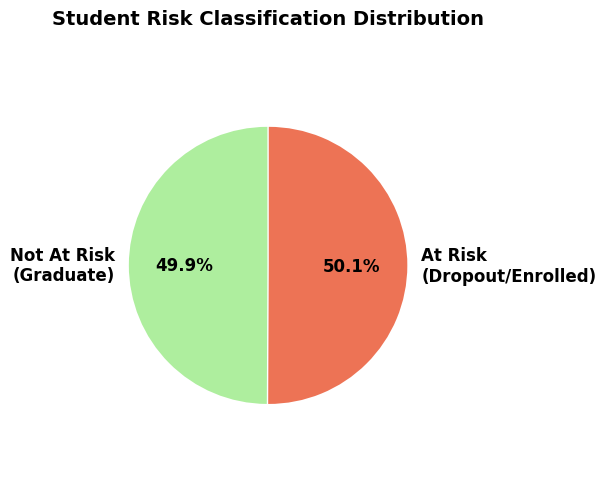

In [58]:
# Create pie chart showing risk classification
plt.figure(figsize=(6,5))

# Count the risk classifications
risk_counts = df_cleaned['Risk'].value_counts().sort_index()
labels = ['Not At Risk\n(Graduate)', 'At Risk\n(Dropout/Enrolled)']
colors = ["#AEEE9E", "#ED7355"]  

# Create pie chart
plt.pie(risk_counts, labels=labels, colors=colors, autopct='%1.1f%%', 
        startangle=90, textprops={'fontsize': 12, 'weight': 'bold'},
        explode=(0.005, 0.005))

plt.title('Student Risk Classification Distribution', fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()



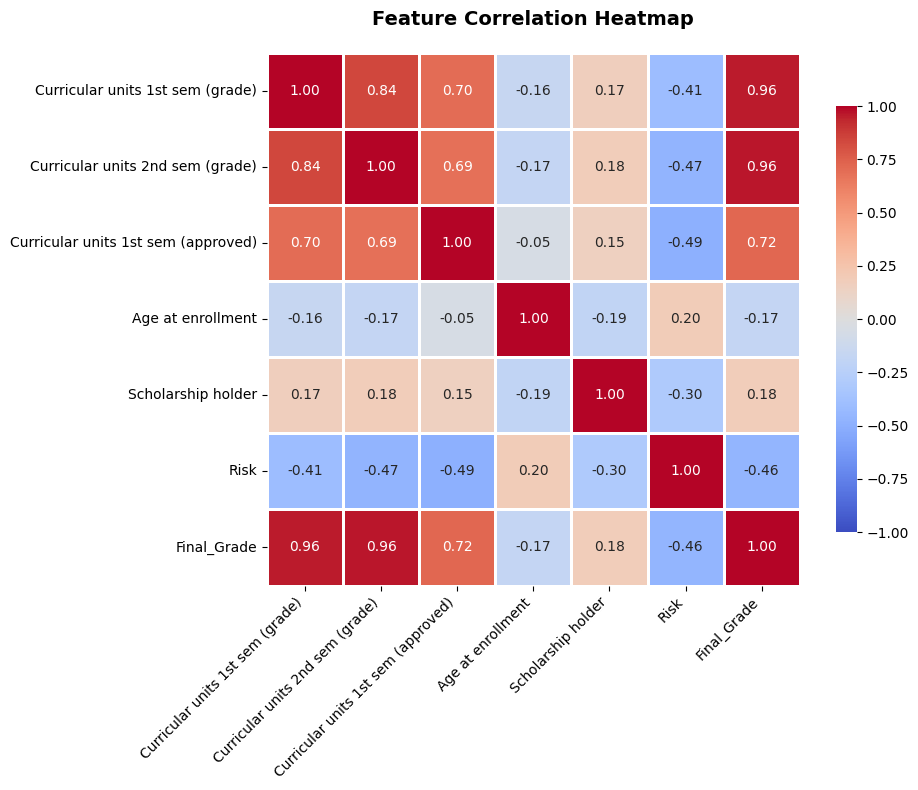

In [59]:
# Create correlation heatmap to identify relationships between features
correlation_matrix = df_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

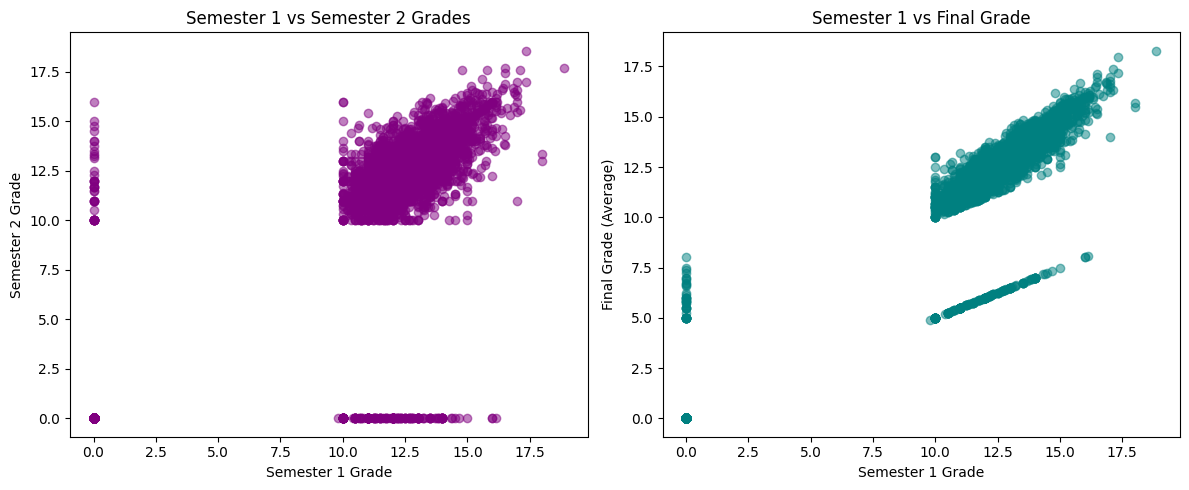

In [63]:
# Scatter plots showing grade progression
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Semester 1 vs Semester 2 grades
axes[0].scatter(df_cleaned['Curricular units 1st sem (grade)'], 
                df_cleaned['Curricular units 2nd sem (grade)'], 
                alpha=0.5, c='Purple')
axes[0].set_xlabel('Semester 1 Grade')
axes[0].set_ylabel('Semester 2 Grade')
axes[0].set_title('Semester 1 vs Semester 2 Grades')

# Plot 2: Semester 1 vs Final Grade
df_cleaned['Final_Grade'] = (df_cleaned['Curricular units 1st sem (grade)'] + 
                               df_cleaned['Curricular units 2nd sem (grade)']) / 2
axes[1].scatter(df_cleaned['Curricular units 1st sem (grade)'], 
                df_cleaned['Final_Grade'], 
                alpha=0.5, c='Teal')
axes[1].set_xlabel('Semester 1 Grade')
axes[1].set_ylabel('Final Grade (Average)')
axes[1].set_title('Semester 1 vs Final Grade')

plt.tight_layout()
plt.show()


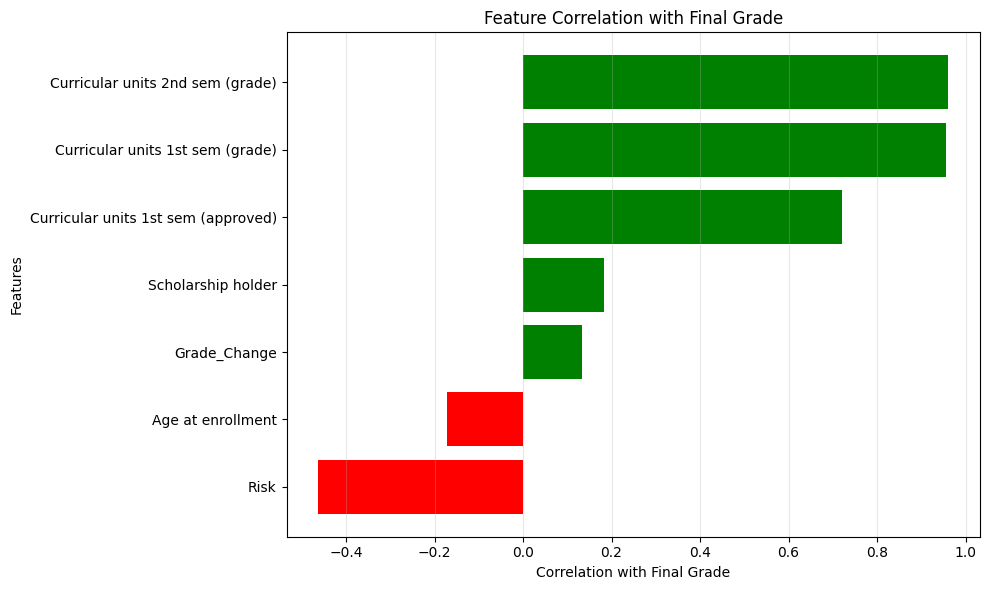

In [80]:
# Calculate correlations with Final Grade
correlations = df_cleaned.corr()['Final_Grade'].drop('Final_Grade').sort_values()
# Create bar chart
plt.figure(figsize=(10, 6))
plt.barh(correlations.index, correlations.values, color=['green' if x > 0 else 'red' for x in correlations.values])
plt.xlabel('Correlation with Final Grade')
plt.ylabel('Features')
plt.title('Feature Correlation with Final Grade')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


In [86]:
# Display all categorical columns and their unique values
print("\nBinary/Categorical Numeric Features:")
for col in df_cleaned.columns:
    unique_count = df_cleaned[col].nunique()
    if unique_count <= 10:  # Likely categorical if 10 or fewer unique values
        unique_values = sorted(df_cleaned[col].unique())
        print(f"  {col}: {unique_values} ({unique_count} unique values)")



Binary/Categorical Numeric Features:
  Scholarship holder: [np.int64(0), np.int64(1)] (2 unique values)
  Risk: [np.int64(0), np.int64(1)] (2 unique values)


In [ ]:
# Define the 5 most important features for the prediction model
X_features = [
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 1st sem (approved)',
    'Age at enrollment',
    'Scholarship holder'
]

y_target = 'Risk'

print("Features for Prediction Model (X):")
for i, feature in enumerate(X_features, 1):
    print(f"  {i}. {feature}")

print(f"\nTarget Variable (y): {y_target}")
print(f"  0 = Not At Risk (Graduate)")
print(f"  1 = At Risk (Dropout/Enrolled)")
